In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy.special import gammainc
from scipy.special import gamma
import mpmath

hfont = {'fontname':'Times New roman'}

In [28]:
lstar_ratio = np.array(range(0,200))/100 + 0.01
colorchoice = ['r', 'c', 'g', 'k']


light = 299792.458
H0 = 67.8#/3.08567758e24 ; centimeters  
little_h = 100./H0

dndx     = [0.61, 0.13, 0.08]
dndxlow  = [0.18, 0.06, 0.03]
dndxhigh = [1.04, 0.20, 0.13]



Luminosity function

phi(L) = phistar x (L/Lstar)^alpha x np.exp(-L/Lstar)/Lstar

In [29]:
# for redshift <z> ~ 5
# mason2015b
mstar   = -21.2
mplus   = -21.0
mminus  = -21.4

phistar   = pow(10, -3.12) 
phiplus   = pow(10, -2.88) 
phiminus  = pow(10, -3.27) 

alpha=-1.75
alphaplus = alpha + 0.13
alphaminus = alpha - 0.13




([<matplotlib.axis.YTick at 0x117ae0e10>,
 <a list of 3 Text yticklabel objects>)

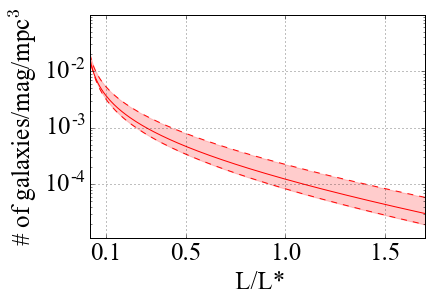

In [30]:
N       = np.zeros(len(lstar_ratio)) 
N_minus = np.zeros(len(lstar_ratio)) 
N_plus  = np.zeros(len(lstar_ratio)) 
for l in range(0, len(lstar_ratio)):
    N[l]        =  phistar*float(mpmath.gammainc(alpha       + 1, lstar_ratio[l]))
    N_plus[l]   =  phiplus*float(mpmath.gammainc(alphaplus   + 1, lstar_ratio[l]))
    N_minus[l]  = phiminus*float(mpmath.gammainc(alphaminus  + 1, lstar_ratio[l]))

plt.plot(lstar_ratio, N, '-', color = colorchoice[0])
plt.plot(lstar_ratio, N_minus, '--', color = colorchoice[0], alpha=10)
plt.plot(lstar_ratio, N_plus, '--', color = colorchoice[0], alpha=10)


plt.fill_between(lstar_ratio, N_minus, N_plus, color = colorchoice[0], alpha = 0.2)


plt.yscale('log')


plt.grid(True)
plt.ylim([0, 0.1] )
plt.xlim([0.02, 1.7])
plt.ylabel('# of galaxies/mag/mpc$^3$', **hfont,  fontsize=25)
plt.xlabel(' L/L*', **hfont,  fontsize=25)


plt.xticks([0.1, 0.5, 1.0, 1.5], **hfont, fontsize = 25)

plt.yticks([pow(10, -4), pow(10, -3), pow(10, -2)], **hfont, fontsize = 25)





# Now get the effective radius

r = pow(0.5, H0/light*dndx/N)

In [35]:
r = pow(0.5, dndx[0]*H0/light/N)

In [40]:
localN = float(N[np.where(lstar_ratio == 1)])

In [46]:
pow(0.5, 0.35*H0/light/localN/3.14)

0.8675852811606727